### Carga de módulos

In [46]:
import os 
import librosa # Librería para manejo de audio
import numpy as np
import pandas as pd
from scipy.io import wavfile 
import IPython.display as ipd # Widget para Jupyter
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier # pip install xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier 

### Funciones relevantes

In [47]:
# Función que concentra cross validation para clasificación
def classification_metrics(X, y, estimator):
    ls_scores_roc = cross_val_score(estimator=estimator, X=X, y=y, scoring="accuracy", n_jobs=-1, cv=4)
    print(f"Accuracy media: {np.mean(ls_scores_roc):,.2f}, desviación estándar: {np.std(ls_scores_roc)}")

In [48]:
# Función que reproduce sonido en Jupyter
def wavPlayer(filepath):
    rate, data = wavfile.read(filepath)
    plt.plot(data)
    plt.show()
    return ipd.Audio(filepath, autoplay=True)

In [49]:
# Función para visualizar el mapa de calor de las frecuencias de sonido
def plot_heatmap(data):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
    plt.colorbar()

In [50]:
# Función que encapsula la lectura del alrchivo, el modelo y las variables para redecir el número
def predict_number(filepath, estimator, features):
    # Apertura del archivo
    x, sr = librosa.load(filepath, sr=None)
    # Generación de tabla para validación
    X_val = pd.DataFrame(np.reshape(abs(librosa.stft(x).mean(axis = 1).T), (1025,1))).T
    X_val.columns = X_train.columns
    real = int(filepath.split('/')[-1][0])
    # Predicción
    pred = int(estimator.predict(X_val)[0])
    print(f"The real is: {real}")
    print(f"The predicted is: {estimator.predict(X_val)[0]}")
    return wavPlayer(filepath=filepath)

## Carga de datos

### Lectura de archivos

In [51]:
from glob import glob

In [52]:
files=glob('free-spoken-digit-dataset-master/recordings/*')

In [53]:
# Carga de archivos de sonido
data=[]
for i in files:
    x, sr = librosa.load(i, sr=None)
    data.append(x)

In [54]:
data

[array([ 0.        , -0.00390625, -0.01171875, ...,  0.00390625,
        -0.01171875, -0.01171875], dtype=float32),
 array([-0.01217651, -0.02359009, -0.00756836, ...,  0.01126099,
         0.01055908,  0.0098877 ], dtype=float32),
 array([ 0.00027466, -0.00057983, -0.00045776, ...,  0.00039673,
         0.00042725, -0.00073242], dtype=float32),
 array([-0.01773071, -0.00518799,  0.01165771, ...,  0.00891113,
         0.00939941,  0.00918579], dtype=float32),
 array([-6.4086914e-04, -3.0517578e-05,  2.4414062e-04, ...,
        -1.0681152e-03, -2.1362305e-04,  5.4931641e-04], dtype=float32),
 array([-0.015625 , -0.015625 , -0.0078125, ..., -0.0078125, -0.015625 ,
        -0.0078125], dtype=float32),
 array([ 0.        , -0.015625  ,  0.        , ..., -0.0078125 ,
        -0.01171875, -0.0078125 ], dtype=float32),
 array([-0.03125   , -0.0390625 , -0.046875  , ..., -0.01171875,
        -0.01171875, -0.0078125 ], dtype=float32),
 array([ 0.        , -0.00390625, -0.00390625, ..., -0.00781

### Transformación

In [55]:
# Aplicación de Transformada de Fourier a frecuencias de sonido
data_tf=[]
for i in range(len(data)):
    data_tf.append(abs(librosa.stft(data[i]).mean(axis = 1).T))
data_tf= np.array(data_tf)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1915
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1805
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2045
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2007
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1597
  n_fft, y.shape[-1]


/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1547
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1801
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1962
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1772
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1963
  n_fft, y.shape[-1]


/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1493
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1753
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1807
  n_fft, y.shape[-1]
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1936
  n_fft, y.shape[-1]


In [56]:
files

['free-spoken-digit-dataset-master/recordings/6_nicolas_30.wav',
 'free-spoken-digit-dataset-master/recordings/3_jackson_25.wav',
 'free-spoken-digit-dataset-master/recordings/6_theo_44.wav',
 'free-spoken-digit-dataset-master/recordings/4_jackson_6.wav',
 'free-spoken-digit-dataset-master/recordings/0_theo_7.wav',
 'free-spoken-digit-dataset-master/recordings/8_nicolas_45.wav',
 'free-spoken-digit-dataset-master/recordings/7_nicolas_19.wav',
 'free-spoken-digit-dataset-master/recordings/3_nicolas_9.wav',
 'free-spoken-digit-dataset-master/recordings/7_nicolas_36.wav',
 'free-spoken-digit-dataset-master/recordings/8_nicolas_7.wav',
 'free-spoken-digit-dataset-master/recordings/4_theo_30.wav',
 'free-spoken-digit-dataset-master/recordings/7_theo_8.wav',
 'free-spoken-digit-dataset-master/recordings/6_jackson_13.wav',
 'free-spoken-digit-dataset-master/recordings/9_jackson_16.wav',
 'free-spoken-digit-dataset-master/recordings/7_nicolas_2.wav',
 'free-spoken-digit-dataset-master/recordin

In [57]:
df = pd.DataFrame(data_tf)
df["target"] = [i.split('/')[-1].split('_')[0] for i in files]

In [58]:
df

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,target
0,7.201530,3.600434,0.008191,0.006902,0.018977,0.015358,0.004646,0.035629,0.081485,0.048791,...,0.092514,0.057947,0.014596,0.109891,0.147597,0.049036,0.008264,0.017762,0.023801,6
1,0.008033,0.006861,0.004814,0.006480,0.004884,0.001825,0.001699,0.008345,0.015683,0.009803,...,0.043813,0.022180,0.000916,0.005320,0.010380,0.005228,0.000845,0.002232,0.001368,3
2,0.000246,0.000698,0.000404,0.002668,0.004248,0.001976,0.000906,0.000461,0.000784,0.000542,...,0.001135,0.000793,0.000429,0.000507,0.000612,0.000488,0.000379,0.001768,0.002942,6
3,0.010646,0.006427,0.002482,0.007077,0.010839,0.006018,0.003031,0.007019,0.011047,0.007780,...,0.005744,0.002665,0.000674,0.008974,0.018736,0.009027,0.000479,0.004235,0.006099,4
4,0.012657,0.008142,0.003004,0.007076,0.008241,0.002240,0.000386,0.007413,0.008603,0.003071,...,0.000597,0.000335,0.000047,0.000453,0.000589,0.000320,0.000198,0.000438,0.000218,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.004988,0.002693,0.000105,0.004637,0.008732,0.004662,0.001905,0.003771,0.006888,0.004672,...,0.002265,0.001136,0.000320,0.001280,0.002636,0.001372,0.000460,0.000094,0.000691,8
1496,0.005003,0.004836,0.001301,0.002735,0.004622,0.002350,0.001350,0.002578,0.006903,0.003571,...,0.001647,0.000530,0.000049,0.000744,0.000989,0.000502,0.000566,0.000130,0.000764,9
1497,0.020994,0.012629,0.003655,0.006381,0.003091,0.002833,0.006475,0.012111,0.030480,0.019712,...,0.055111,0.026220,0.017733,0.015604,0.054319,0.043663,0.014726,0.024418,0.026493,5
1498,0.002501,0.001966,0.001193,0.005169,0.007571,0.002515,0.001109,0.009918,0.016820,0.007364,...,0.001920,0.001194,0.000256,0.001076,0.001615,0.000793,0.000026,0.000354,0.000482,0


### EDA

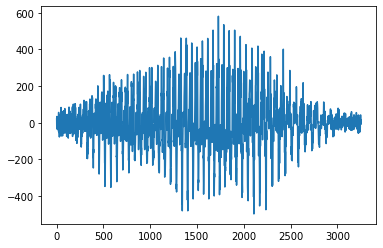

In [59]:
# Visualización de frecuencias de sonido
wavPlayer("free-spoken-digit-dataset-master/recordings/0_theo_37.wav")

In [60]:
data_tf.shape

(1500, 1025)

In [61]:
# Preparación de X y y
X = df[[x for x in df.columns if x != "target"]]
y = df["target"]

In [62]:
y.value_counts()

5    150
2    150
7    150
3    150
8    150
1    150
4    150
6    150
9    150
0    150
Name: target, dtype: int64

### Separación de sets

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Modelado

### Bosque Aleatorio

#### Modelado

In [32]:
RandomForestClassifier?


In [64]:
bos = RandomForestClassifier(n_estimators=100, max_depth=5)

In [65]:
bos.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

#### Cross-validation

In [22]:
classification_metrics(X=X_train, y=y_train, estimator=bos)

Accuracy media: 0.71, desviación estándar: 0.037039436724618006


#### Hyperparametrización

In [23]:
param_dict = {"n_estimators": [x for x in range(100, 1500, 100)], # Número de árboles a construir
              "max_features": ["auto", "sqrt", "log2"], # Número máximo de variables a considerar
              "criterion": ["gini", "entropy"], # Criterio de selección de corte
              "class_weight": ["balanced", None], # Balanceo o no de la target
              "min_samples_split": [x for x in range(2, 50, 2)], # Número mínimo de muestras que debe tener una hoja para cortar
              "min_samples_leaf": [x/100 for x in range(5, 55, 5)]} # Número mínimo que debe tener una hoja

In [24]:
# Búsqueda aleatorizada
search = RandomizedSearchCV(param_distributions=param_dict, cv=4, n_jobs=-1, scoring="accuracy", estimator=bos, verbose=5,n_iter=10)

In [25]:

search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   16.0s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   16.8s finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(max_depth=5),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0.05, 0.1, 0.15,
                                                             0.2, 0.25, 0.3,
                                                             0.35, 0.4, 0.45,
                                                             0.5],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28, 30, 32, 3

In [26]:
search.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features='log2', min_samples_leaf=0.1,
                       min_samples_split=4)

In [27]:
search.best_score_

0.5066946821130208

### AdaBoost

#### Modelado

In [28]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.05)

#### Cross-validation

In [66]:
# Cross validation
classification_metrics(X=X_train, y=y_train, estimator=ada)

Accuracy media: 0.34, desviación estándar: 0.02962595952220143


#### Hyperparametrización

In [30]:
# Hiperparametrización
search_grid={'n_estimators':[50,100,200],
             'learning_rate':[.001,0.01,.1]}

In [31]:
search = RandomizedSearchCV(param_distributions=search_grid, cv=4, n_jobs=-1, scoring="accuracy", estimator=ada, verbose=5,n_iter=9)

In [32]:
search.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:  1.2min remaining:   17.3s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.5min finished


RandomizedSearchCV(cv=4,
                   estimator=AdaBoostClassifier(learning_rate=0.05,
                                                n_estimators=100),
                   n_iter=9, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy', verbose=5)

In [33]:
search.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=200)

In [35]:
search.best_score_

0.3742680649150703

### Gradient Boosting

#### Modelado

In [36]:
gb = GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=0.05)

#### Cross-validation

In [37]:
classification_metrics(X=X_train, y=y_train, estimator=gb)

Accuracy media: 0.85, desviación estándar: 0.018564626372403473


### Voting

#### Modelado

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
naiveb = GaussianNB()
logreg = LogisticRegression()
dctree = DecisionTreeClassifier()

In [40]:
vc = VotingClassifier(estimators=[("logreg", logreg), ("arbol", dctree), ("bayes", naiveb)], voting='soft')

In [41]:
classification_metrics(X=X_train, y=y_train, estimator=vc)

Accuracy media: 0.77, desviación estándar: 0.028630832926526573


##### Cross-validation

In [42]:
vc = VotingClassifier(estimators=[("logreg", logreg), ("arbol", dctree), ("bayes", naiveb)], voting='hard')

In [43]:
classification_metrics(X=X_train, y=y_train, estimator=vc)

Accuracy media: 0.75, desviación estándar: 0.03998455317494614


### XGBoost

#### Modelado

In [44]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=190, max_depth=5, subsample=0.9, colsample_bytree=0.8, seed=23333)

In [45]:
xgb.fit(X_train, y_train)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:15:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=190, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=23333, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=23333, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Cross-validation

In [59]:
xgb.score(X_test, y_test)

0.92

### Análisis de resultados

In [60]:
# Predicción del número de acuerdo con sus atributos
df["pred"] = xgb.predict(X)

In [61]:
# Análisis de predicción por clases
confusion_matrix(y_true=df["target"], y_pred=df["pred"], labels=[x for x in map(str, range(10))])

array([[148,   0,   0,   0,   0,   0,   0,   1,   0,   1],
       [  0, 147,   0,   0,   1,   0,   0,   1,   0,   1],
       [  0,   0, 150,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   3, 143,   0,   0,   2,   0,   1,   0],
       [  0,   0,   0,   0, 148,   1,   0,   1,   0,   0],
       [  0,   1,   0,   0,   0, 148,   0,   1,   0,   0],
       [  1,   0,   1,   1,   0,   0, 146,   1,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0, 148,   0,   1],
       [  0,   0,   1,   0,   0,   0,   2,   1, 146,   0],
       [  1,   0,   0,   1,   0,   1,   0,   1,   0, 146]])

In [62]:
# Accuracy por clase
for num in sorted(df["target"].unique()):
    print(num, accuracy_score(y_true=df.loc[df["target"] == num, "target"], y_pred=df.loc[df["target"] == num, "pred"]))

0 0.9866666666666667
1 0.98
2 1.0
3 0.9533333333333334
4 0.9866666666666667
5 0.9866666666666667
6 0.9733333333333334
7 0.9866666666666667
8 0.9733333333333334
9 0.9733333333333334


In [63]:
# Accuracy global
accuracy_score(y_true=df["target"], y_pred=df["pred"])

0.98